# https://www.youtube.com/watch?v=fqltiq5EahU&ab_channel=MattMacarty
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# get and clean data

In [41]:
gld = pdr.get_data_yahoo('GLD')
gld['Day'] = np.arange(1, len(gld)+1)
gld.drop(columns=['Volume', 'Adj Close'], inplace=True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]

In [42]:
gld

,Day,Open,High,Low,Close
Date,,,,,
2017-06-07,1,122.790001,123.160004,122.019997,122.449997
2017-06-08,2,122.070000,122.080002,120.949997,121.650002
2017-06-09,3,120.459999,120.910004,120.400002,120.540001
2017-06-12,4,120.330002,120.690002,120.269997,120.360001
2017-06-13,5,119.949997,120.709999,119.919998,120.480003
...,...,...,...,...,...
2022-05-31,1255,172.710007,173.070007,171.080002,171.139999
2022-06-01,1256,172.210007,172.529999,171.389999,172.229996
2022-06-02,1257,173.660004,174.449997,173.490005,174.350006


# transform data

In [43]:
# add moving averages
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(42).mean().shift()
gld.dropna(inplace=True)

# add 'signal'
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])

#
gld

,Day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2017-08-07,43,119.430000,119.790001,119.430000,119.510002,120.146667,118.703095,1
2017-08-08,44,120.019997,120.120003,118.970001,119.860001,120.212223,118.633095,1
2017-08-09,45,121.019997,121.550003,120.760002,121.309998,120.210001,118.590476,1
2017-08-10,46,122.080002,122.440002,122.029999,122.209999,120.378889,118.608809,1
2017-08-11,47,122.239998,122.830002,122.029999,122.790001,120.547778,118.652857,1
...,...,...,...,...,...,...,...,...
2022-05-31,1255,172.710007,173.070007,171.080002,171.139999,172.037779,176.695476,-1
2022-06-01,1256,172.210007,172.529999,171.389999,172.229996,172.238890,176.470714,-1
2022-06-02,1257,173.660004,174.449997,173.490005,174.350006,172.551112,176.270238,-1


# calculate returns

In [44]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff() #says where sign changed
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-08-07,43,119.430000,119.790001,119.430000,119.510002,120.146667,118.703095,1,NaN,NaN,NaN
2017-08-08,44,120.019997,120.120003,118.970001,119.860001,120.212223,118.633095,1,0.002924,0.002924,0.0
2017-08-09,45,121.019997,121.550003,120.760002,121.309998,120.210001,118.590476,1,0.012025,0.012025,0.0
2017-08-10,46,122.080002,122.440002,122.029999,122.209999,120.378889,118.608809,1,0.007392,0.007392,0.0
2017-08-11,47,122.239998,122.830002,122.029999,122.790001,120.547778,118.652857,1,0.004735,0.004735,0.0


# Plot trades

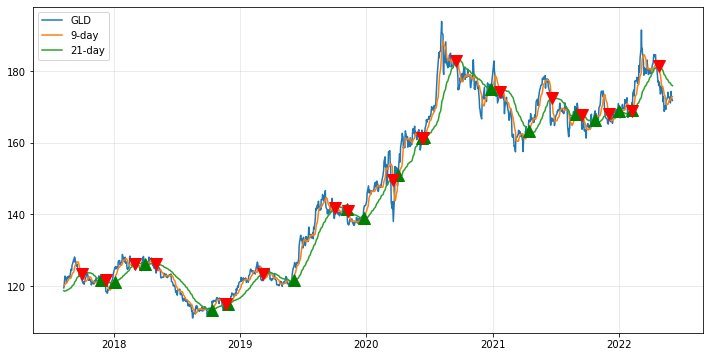

In [45]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
#lines
plt.plot(gld['Close'], label = 'GLD')
plt.plot(gld['9-day'], label = '9-day')
plt.plot(gld['21-day'], label = '21-day')
#markers
plt.plot(gld.loc[gld.entry == 2].index, gld['9-day'][gld.entry==2], '^', color='g', markersize=12)
plt.plot(gld.loc[gld.entry == -2].index, gld['21-day'][gld.entry==-2], 'v', color='r', markersize=12)
plt.legend()

# Compare returns

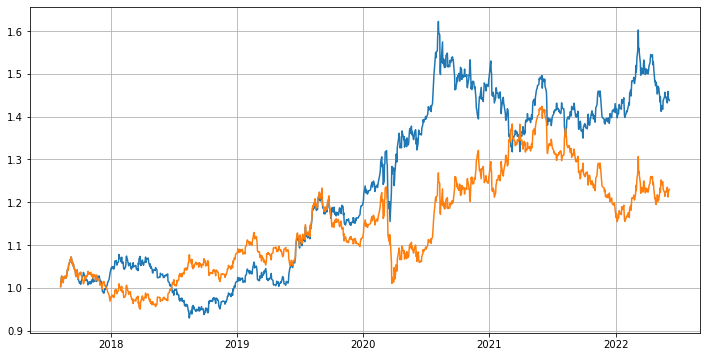

In [46]:
plt.plot(np.exp(gld['return']).cumprod(), label='HODL')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend
plt.grid(True)

In [47]:
gld.tail()

,Day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2022-05-31,1255,172.710007,173.070007,171.080002,171.139999,172.037779,176.695476,-1,-0.009942,0.009942,0.0
2022-06-01,1256,172.210007,172.529999,171.389999,172.229996,172.238890,176.470714,-1,0.006349,-0.006349,0.0
2022-06-02,1257,173.660004,174.449997,173.490005,174.350006,172.551112,176.270238,-1,0.012234,-0.012234,0.0
2022-06-03,1258,173.529999,173.970001,172.250000,172.580002,172.822223,176.147619,-1,-0.010204,0.010204,0.0
2022-06-06,1259,172.809998,172.886902,171.660004,171.820007,172.883335,175.962143,-1,-0.004413,0.004413,0.0


In [48]:
np.exp(gld['return']).cumprod()[-1]-1

0.4377039934143725

In [49]:
np.exp(gld['system_return']).cumprod()[-1]-1

0.23021863661339204